<a href="https://colab.research.google.com/github/Bornord/DeepLearning/blob/main/Projet_LeVrai2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET CLASSIFICATION

In [1]:
IMAGE_SIZE = 256
CLASSES = ['akina','antoine','enguerran','skander','willem']

import glob
import PIL
from PIL import Image
import numpy as np
import os

def load_data(path, classes, image_size=64):

  # Liste les fichiers présents dans le dossier path
  tmp = 0
  for name in classes : 
      folder = path + name + '-image-files/'
      file_path =[folder+f for f in os.listdir(folder)]
      tmp = tmp + len(file_path)


  x = np.zeros((tmp, image_size, image_size, 4))
  y = np.zeros((tmp, len(classes)))
  for name in classes : 
      folder = path + name + '-image-files/'

      file_path =[folder+f for f in os.listdir(folder)]
      # Initialise les structures de données
      nb_file = len(file_path)
      for i in range(nb_file):
      # Lecture de l'image
          img = Image.open(file_path[i])
          # Mise à l'échelle de l'image
          img = img.resize((image_size,image_size), Image.ANTIALIAS)
          # Remplissage de la variable x
          x[classes.index(name)*nb_file + i] = np.asarray(img)

          #img_path_split = file_path[i].split('/')
          #img_name_split = img_path_split[-1].split('.')
          class_label = classes.index(name)
      
          y[classes.index(name)*nb_file + i] = [0]*len(classes)
          y[classes.index(name)*nb_file + i][class_label] = 1

  return x, y

X_TRAIN, Y_TRAIN = load_data('../AudioCut/ImagesResultats/', CLASSES, image_size=IMAGE_SIZE)
#x_val, y_val = load_data('./iam/tp3/validation/*', CLASSES, image_size=IMAGE_SIZE)
#x_test, y_test = load_data('./iam/tp3/test/*', CLASSES, image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
X_TRAIN = X_TRAIN/255
import random
x_train_indexes = [i for i in range(len(X_TRAIN))]
random.shuffle(x_train_indexes)

X_TRAIN, Y_TRAIN = [X_TRAIN[i] for i in x_train_indexes],[Y_TRAIN[i] for i in x_train_indexes]
X_VAL,Y_VAL = [X_TRAIN[i] for i in range((int) (len(X_TRAIN)/10))],[Y_TRAIN[i] for i in range((int) (len(Y_TRAIN)/10))]
#x_val = x_val/255
#x_test = x_test/255

In [2]:
#!git clone https://github.com/Bornord/DeepLearning.git
#path = "./iam/tp3/"

In [21]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import optimizers
model = Sequential()
# A COMPLETER"

model.add(Input(X_TRAIN[0].shape))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', strides = 1, input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), input_shape = (64, 64, 3), padding = 'same'))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', strides = 1, input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), input_shape = (64, 64, 3), padding = 'same'))
model.add(Conv2D(96, (3, 3), padding = 'same', activation = 'relu', strides = 1, input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), input_shape = (64, 64, 3), padding = 'same'))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', strides = 1, input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), input_shape = (64, 64, 3), padding = 'same'))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation = 'relu', input_dim = 2))   # Couche dense, à 512 neurones
model.add(Dense(len(CLASSES),activation="sigmoid"))   # Couche de sortie
model.add(Softmax()) 

model.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])


# TODO
print(len(Y_TRAIN[0]))
history = model.fit(np.array(X_TRAIN), np.array(Y_TRAIN), 
                    validation_data=(np.array(X_VAL), np.array(Y_VAL)),
                    epochs=10,
                    )

#Y_test = model.



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      1184      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 128)     

In [30]:
X_TEST,Y_TEST = [X_TRAIN[i] for i in range((int) (len(X_TRAIN)/10))],[Y_TRAIN[i] for i in range((int) (len(Y_TRAIN)/10))]

model.evaluate(np.array(X_TEST),  np.array(Y_TEST), verbose=2)
#probability_model = Sequential([model,Softmax(len(CLASSES))])
print(model.predict(np.array(X_TEST)))
print(Y_TEST)

2/2 - 0s - loss: 0.3226 - accuracy: 0.8200
[[0.14886032 0.14884523 0.14884609 0.14884523 0.40460324]
 [0.14886905 0.14884333 0.1488462  0.14884333 0.40459803]
 [0.14885436 0.14884384 0.14885844 0.14884384 0.4045995 ]
 [0.14885582 0.14884615 0.14884615 0.40460566 0.14884615]
 [0.1489603  0.1488285  0.1488285  0.40455422 0.1488285 ]
 [0.14886418 0.1488441  0.14884743 0.1488441  0.40460017]
 [0.40392366 0.14896987 0.14916645 0.14896987 0.14897019]
 [0.1488515  0.14884935 0.40460014 0.14884935 0.14884962]
 [0.4045917  0.14884858 0.14884904 0.14884858 0.14886203]
 [0.40457332 0.14884946 0.14885609 0.14884946 0.14887157]
 [0.40451628 0.1488585  0.14890692 0.1488585  0.1488598 ]
 [0.14886644 0.14884384 0.14884643 0.14884384 0.4045995 ]
 [0.11855154 0.32209215 0.3222546  0.11855084 0.11855084]
 [0.14884971 0.14885178 0.40460584 0.14884633 0.14884634]
 [0.1488623  0.1488437  0.1488512  0.1488437  0.4045991 ]
 [0.40459073 0.1488484  0.14885035 0.1488484  0.14886208]
 [0.11854014 0.32215494 0.322

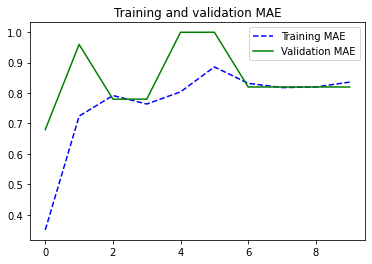

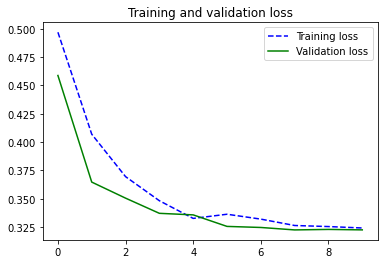

In [31]:
import matplotlib.pyplot as plt 

def plot_training_analysis(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training MAE')
  plt.plot(epochs, val_acc, 'g', label='Validation MAE')
  plt.title('Training and validation MAE')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_training_analysis(history)


# Transfert d'apprentissage



In [32]:
from tensorflow.keras.applications import VGG16

# TODO 
conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [33]:
train_features = conv_base.predict(x_train)
train_features = np.reshape(train_features,(train_features.shape[0],2*2*512))

val_features = conv_base.predict(x_val)
val_features = np.reshape(val_features,(val_features.shape[0],2*2*512))

NameError: name 'x_train' is not defined

In [ ]:
# TODO 
model = Sequential()
 
model.add(Dense(256, activation = 'relu', input_shape=(64, 64, 3)))   # Couche dense
model.add(Dense(1, activation = 'sigmoid'))   # Couche de sortie

model.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT
model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# COMPLETER AVEC LES TENSEURS SUR LESQUELS EFFECTUER L'APPRENTISSAGE
history = model.fit(train_features,
                    epochs=50,
                    batch_size=16,
                    validation_data=val_features)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=10,
                    )